# **Drug Discovery [Part 4] Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.
This is the same model as used in class, this is to prove that IWSSR does in fact improve the r2 score.

In the class while using the coronavirus dataset we achieved an r2 score of 0.44 without using IWSSR.
In this same notebook while using the H3N1 dataset we achieved an r2 score of 0.53 - already a significant improvement.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [4]:
df = pd.read_csv('/content/H3N1_Descriptor_IWSSR_Scaled.csv')
df = df.drop('Unnamed: 0', axis=1)

## **3. Input features**
The ***Coronavirus*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,MW,LogP,NumHDonors,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,...,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP839,PubchemFP842,PubchemFP860,PubchemFP863
0,-0.262890,-1.911570,2.545291,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
1,-0.288683,-0.643764,1.563699,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,1.705606,2.369680,-0.848528,4.527693
2,-0.845597,-1.703369,0.582107,-1.877849,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
3,-0.580063,-0.294631,0.091311,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
4,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.062234,0.686329,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863
82,-0.348286,0.208965,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863
83,1.592832,1.614519,1.563699,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
84,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,4.527693,-0.532524,2.091650,4.024922,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

0    -0.189483
1     0.235179
2    -1.098052
3     1.700238
4     0.068845
        ...   
81   -1.046362
82   -1.680254
83   -1.003172
84   -1.530502
85    0.873788
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(86, 305)

In [8]:
Y.shape

(86,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(86, 305)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((68, 305), (68,))

In [13]:
X_test.shape, Y_test.shape

((18, 305), (18,))

## **5. Building a Regression Model using Random Forest**

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
r2 = model.score(X_test, Y_test)
r2

0.5337802341148591

In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

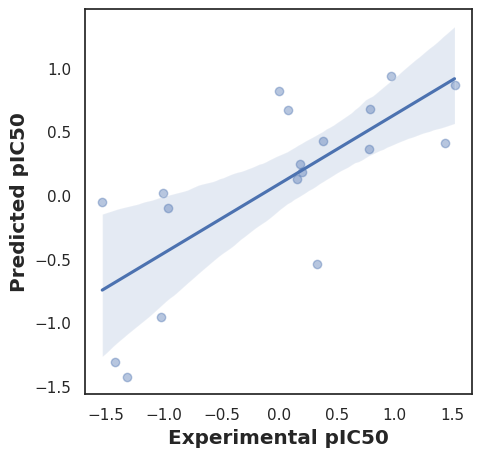

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()